In [1]:
import pandas as pd

In [35]:
data = pd.read_csv(r"C:\Users\HUSSAM-LAP\Desktop\ML\Copy of default of credit card clients.csv")

In [27]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# Get rid of missing values:

In [5]:
data['SEX'].unique()

array([2, 1], dtype=int64)

In [6]:
data['MARRIAGE'].unique()# (1=married, 2=single, 3=others)

array([1, 2, 3, 0], dtype=int64)

In [7]:
data = data[data["MARRIAGE"] != 0]

<AxesSubplot:>

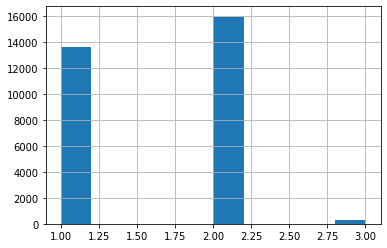

In [8]:
data['MARRIAGE'].hist()

In [9]:
data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
data["EDUCATION"].unique()#(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

<AxesSubplot:>

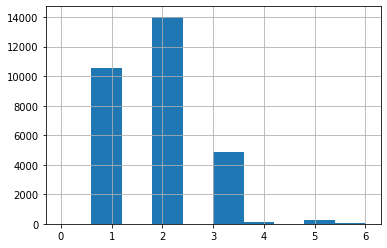

In [11]:
data["EDUCATION"].hist()

In [12]:
data = data[data["EDUCATION"] != 0]

<AxesSubplot:>

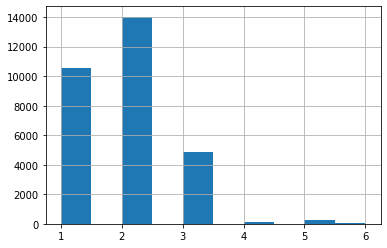

In [13]:
data["EDUCATION"].hist()

# Dicritization and Encoding AGE attribute:

In [14]:
import numpy as np
np.sort(data["AGE"].unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 79], dtype=int64)

<AxesSubplot:>

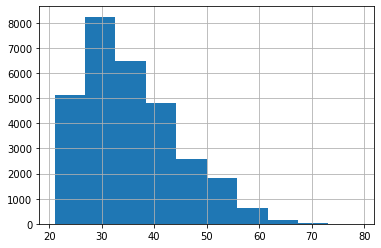

In [15]:
data["AGE"].hist()

In [16]:
data["AGE"] = pd.cut(data["AGE"], 6, labels=["AGE20", "AGE30", "AGE40", "AGE50", "AGE60", "AGE70"] )

In [17]:
data["AGE"]

0        AGE20
1        AGE20
2        AGE30
3        AGE30
4        AGE50
         ...  
29995    AGE30
29996    AGE40
29997    AGE30
29998    AGE40
29999    AGE40
Name: AGE, Length: 29932, dtype: category
Categories (6, object): ['AGE20' < 'AGE30' < 'AGE40' < 'AGE50' < 'AGE60' < 'AGE70']

In [18]:
# data["AGE"] = pd.get_dummies(data["AGE"])
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
# transform data
data["AGE"] = encoder.fit_transform(np.array(data["AGE"]).reshape(-1, 1))

In [19]:
data["AGE"].unique()

array([0., 1., 3., 2., 4., 5.])

<AxesSubplot:>

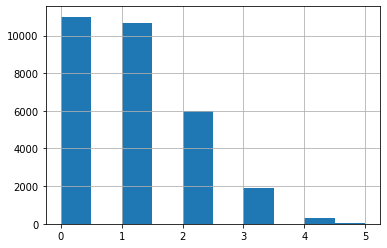

In [21]:
data["AGE"].hist()

# Function to do all the preivous steps:

In [39]:
def preprocessing(data):
    # get rid of missing values in MARRIAGE column
    data = data[data["MARRIAGE"] != 0]   
    
    # get rid of missing values in EDUCATION column
    data = data[data["EDUCATION"] != 0]    
    
    # discritize the AGE attribute to 6 interval
    data["AGE"] = pd.cut(data["AGE"], 6, labels=["AGE20", "AGE30", "AGE40", "AGE50", "AGE60", "AGE70"] )    
    #ordinal encoding
    encoder = OrdinalEncoder()
    # transform data
    data["AGE"] = encoder.fit_transform(np.array(data["AGE"]).reshape(-1, 1))
    
    return data

In [40]:
data = preprocessing(data)

In [ ]:
data